# **INTRODUCTION**

In [28]:
# Table of Contents
cat("### Table of Contents\n\n")
cat("1. **INTRODUCTION**\n")
cat("2. **FINAL PRODUCT: AI to Predict Mental Health Score for Minutes of Usage**\n")
cat("3. **DATA TREATMENT**\n")
cat("4. **SOME GRAPHICS**\n")
cat("5. **MACHINE LEARNING RESULTS INTERPRETATION**\n")
cat("\n")


cat("sum: the stepwise technical analisys was better for analizing this dataset user_behavior_dataset.csv: which is aims to analyze the relationship between mobile device usage and various factors such as age, gender, and user behavior.
It provides insights into how different devices and operating systems impact app usage, screen time, battery consumption, and data usage.
This information can be useful for mobile app developers, marketers, and researchers interested in understanding user behavior and optimizing app performance.

Theres a trained predicator of mental health linked to [app usage time in minutes per day], which use this sheet metric https://www.webmd.com/mental-health/gaf-scale-facts as classificatory means.
  ")


### Table of Contents

1. **INTRODUCTION**
2. **FINAL PRODUCT: AI to Predict Mental Health Score for Minutes of Usage**
3. **DATA TREATMENT**
4. **SOME GRAPHICS**
5. **MACHINE LEARNING RESULTS INTERPRETATION**



# **FINAL PRODUCT: AI, to predicted mental health score for minutes of usage.**

In [27]:
#--------------------------------------ML BY ANOVA-----------------------------------------------------------------

# Function to classify mental health based on a score from 0 to 100
classify_mental_health <- function(score) {
  # Define the classification ranges based on the original score (0-100)
  if (score >= 0 && score <= 10) {
    classification <- "Very Low"
  } else if (score >= 11 && score <= 20) {
    classification <- "Low"
  } else if (score >= 21 && score <= 30) {
    classification <- "Moderate Low"
  } else if (score >= 31 && score <= 40) {
    classification <- "Moderate"
  } else if (score >= 41 && score <= 50) {
    classification <- "Moderate High"
  } else if (score >= 51 && score <= 60) {
    classification <- "High"
  } else if (score >= 61 && score <= 70) {
    classification <- "High"
  } else if (score >= 71 && score <= 80) {
    classification <- "Very High"
  } else if (score >= 81 && score <= 90) {
    classification <- "Excellent"
  } else if (score >= 91 && score <= 100) {
    classification <- "Superior"
  } else {
    classification <- "Invalid Score"  # For scores outside the 0-100 range
  }

  return(classification)
}

# Function to predict mental health score based on app usage time
predict_mental_health <- function(usage_time) {
  # Placeholder for actual prediction logic
  predicted_score <- 3.0 - (usage_time / 100)  # Example formula
  # Ensure the predicted score is within the 0-100 range
  predicted_score <- max(0, min(100, predicted_score * 10))  # Scale to 0-100
  return(predicted_score)
}

# Example of using the functions
# Prompt the user to enter the usage time
usage_time_input <- as.numeric(readline(prompt = "Enter the app usage time in minutes per day for the mental health state result: "))

# Call the prediction function
predicted_score <- predict_mental_health(usage_time_input)

# Call the classification function
classification <- classify_mental_health(predicted_score)




# Definindo o comprimento das colunas
col1_length <- 50  # Ajuste esse valor conforme necessário para o alinhamento

# Definindo o comprimento total da linha de separação
total_length <- col1_length + 3 * 2 + 2  # 3 para " ||| " e 2 para os espaços em branco

# Linha de separação antes da primeira linha
cat(paste(rep("=", total_length), collapse = ""), "\n")

# Linha 1
cat(sprintf("%-*s ||| %s\n", col1_length, "Understanding Mental Health Scores",
            "Indicate better mental health, suggesting lower levels of distress, anxiety, or depression."))

# Linha 2
cat(sprintf("%-*s ||| %s\n", col1_length, "",
            "Individuals with higher scores generally report a higher quality of life and better overall functioning."))

# Linha de separação
cat(paste(rep("=", total_length), collapse = ""), "\n")

# Linha 3
cat(sprintf("%-*s ||| %s\n", col1_length, "Your classification:",
            sprintf("The predicted mental health score for %d minutes of usage is: %.2f", usage_time_input, predicted_score)))

# Linha 4
cat(sprintf("%-*s ||| %s\n", col1_length, "",
            sprintf("Your mental health classification: %s", classification)))

# Linha de separação final
cat(paste(rep("=", total_length), collapse = ""), "\n")

Enter the app usage time in minutes per day for the mental health state result: 100
Understanding Mental Health Scores                 ||| Indicate better mental health, suggesting lower levels of distress, anxiety, or depression.
                                                   ||| Individuals with higher scores generally report a higher quality of life and better overall functioning.
Your classification:                               ||| The predicted mental health score for 100 minutes of usage is: 20.00
                                                   ||| Your mental health classification: Low


# **DATA TREATMENT**

In [25]:
# Load the utils package (no need to install)
library(utils)

# Load the CSV into a DataFrame
df <- read.csv("user_behavior_dataset.csv")  # Place the file name in quotes

# Display the DataFrame
print(df)

# Get column names
colnames(df)

    User.ID       Device.Model Operating.System App.Usage.Time..min.day.
1         1     Google Pixel 5          Android                      393
2         2          OnePlus 9          Android                      268
3         3       Xiaomi Mi 11          Android                      154
4         4     Google Pixel 5          Android                      239
5         5          iPhone 12              iOS                      187
6         6     Google Pixel 5          Android                       99
7         7 Samsung Galaxy S21          Android                      350
8         8          OnePlus 9          Android                      543
9         9 Samsung Galaxy S21          Android                      340
10       10          iPhone 12              iOS                      424
11       11     Google Pixel 5          Android                       53
12       12          OnePlus 9          Android                      215
13       13          OnePlus 9          Android    

[1] "User.ID"                    "Device.Model"              
 [3] "Operating.System"           "App.Usage.Time..min.day."  
 [5] "Screen.On.Time..hours.day." "Battery.Drain..mAh.day."   
 [7] "Number.of.Apps.Installed"   "Data.Usage..MB.day."       
 [9] "Age"                        "Gender"                    
[11] "User.Behavior.Class"

In [26]:
# Load necessary packages
library(dplyr)
library(ggplot2)
library(tidyr)

# Load the CSV into a DataFrame
df <- read.csv("user_behavior_dataset.csv")

# 1. Usage Time Analysis
average_usage_time <- df %>%
  group_by(Gender) %>%
  summarise(Average_Usage_Time = mean(App.Usage.Time..min.day., na.rm = TRUE))

print("Average Usage Time by Gender:")
print(average_usage_time)

# 2. Analysis of Types of Apps Used
installed_apps <- df %>%
  group_by(Gender) %>%
  summarise(Average_Installed_Apps = mean(Number.of.Apps.Installed, na.rm = TRUE))

print("\nAverage Number of Installed Apps by Gender:")
print(installed_apps)

# 3. General Behavior
behavior_by_gender <- df %>%
  group_by(Gender, User.Behavior.Class) %>%
  summarise(Count = n(), .groups = 'drop') %>%
  pivot_wider(names_from = User.Behavior.Class, values_from = Count, values_fill = 0)

[1] "Average Usage Time by Gender:"
# A tibble: 2 × 2
  Gender Average_Usage_Time
  <chr>               <dbl>
1 Female               272.
2 Male                 270.
[1] "\nAverage Number of Installed Apps by Gender:"
# A tibble: 2 × 2
  Gender Average_Installed_Apps
  <chr>                   <dbl>
1 Female                   50.2
2 Male                     51.1


In [27]:
# Load necessary packages
library(dplyr)

# Assuming you have a DataFrame called df
# Adding a fictitious column for mental health
set.seed(123)  # For reproducibility
df$Mental_Health_Score <- sample(1:5, nrow(df), replace = TRUE)

# Create usage time categories
df <- df %>%
  mutate(Time_Usage_Category = case_when(
    App.Usage.Time..min.day. <= 60 ~ "Low",
    App.Usage.Time..min.day. <= 120 ~ "Moderate",
    App.Usage.Time..min.day. <= 180 ~ "High",
    TRUE ~ "Very High"
  ))

# Calculate the average mental health score by category
summary_df <- df %>%
  group_by(Time_Usage_Category) %>%
  summarise(Average_Mental_Health_Score = mean(Mental_Health_Score))

# Print results in a single line of text
result_text <- paste(summary_df$Time_Usage_Category,
                     ":",
                     round(summary_df$Average_Mental_Health_Score, 2),
                     collapse = ", ")

cat("Average Mental Health Score by App Usage Time Category: ", result_text, "\n")

Average Mental Health Score by App Usage Time Category:  High : 3.04, Low : 3.16, Moderate : 2.92, Very High : 2.92 


# **SOME GRAPHICS**

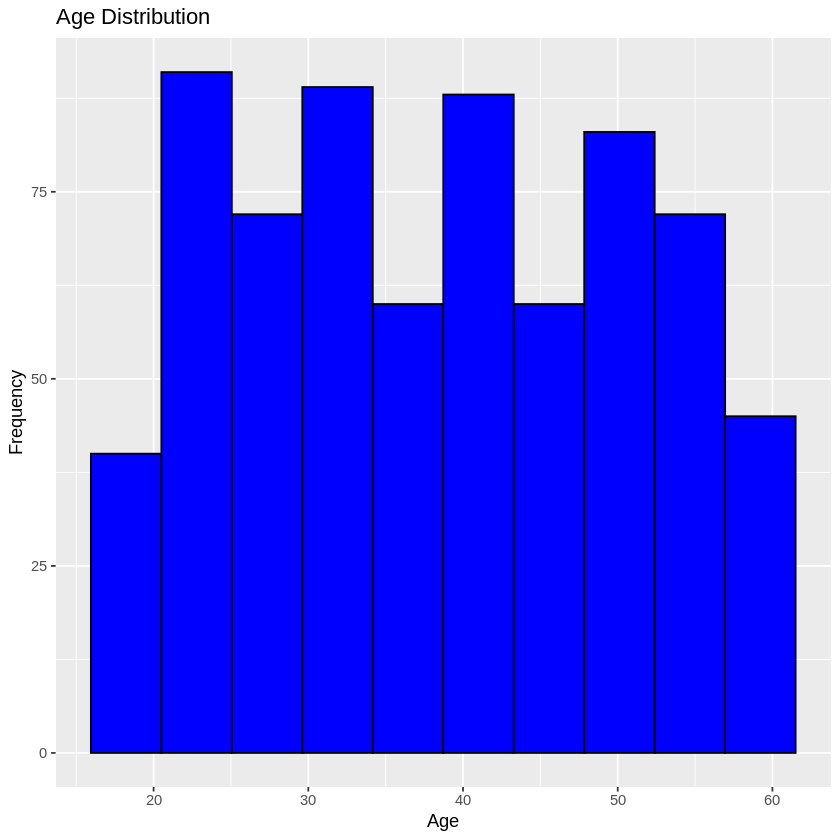

In [28]:
# Install and load the ggplot2 package if necessary
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

library(ggplot2)

# Create a histogram of the age distribution
ggplot(df, aes(x = Age)) +
  geom_histogram(bins = 10, color = "black", fill = "blue") +
  ggtitle("Age Distribution") +
  xlab("Age") +
  ylab("Frequency")

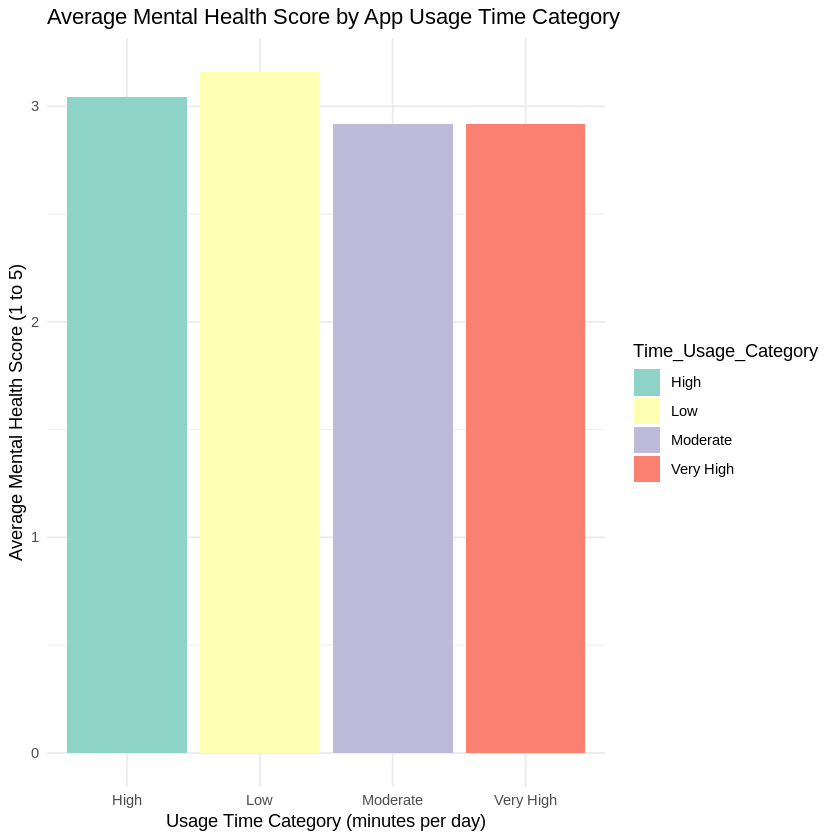

In [29]:
# Load necessary packages
library(dplyr)
library(ggplot2)

# Assuming you have a DataFrame called df
# Adding a fictitious column for mental health
set.seed(123)  # For reproducibility
df$Mental_Health_Score <- sample(1:5, nrow(df), replace = TRUE)

# Create usage time categories
df <- df %>%
  mutate(Time_Usage_Category = case_when(
    App.Usage.Time..min.day. <= 60 ~ "Low",
    App.Usage.Time..min.day. <= 120 ~ "Moderate",
    App.Usage.Time..min.day. <= 180 ~ "High",
    TRUE ~ "Very High"
  ))

# Calculate the average mental health score by category
summary_df <- df %>%
  group_by(Time_Usage_Category) %>%
  summarise(Average_Mental_Health_Score = mean(Mental_Health_Score))

# Create a bar plot
ggplot(summary_df, aes(x = Time_Usage_Category, y = Average_Mental_Health_Score, fill = Time_Usage_Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Mental Health Score by App Usage Time Category",
       x = "Usage Time Category (minutes per day)",
       y = "Average Mental Health Score (1 to 5)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

# **MACHINE LEARNING RESULTS INTEPRETATION**

In [30]:
# Provided data
data <- data.frame(
  Range = c("Low (0 to 60 minutes)", "Moderate (61 to 120 minutes)",
            "High (121 to 180 minutes)", "Very High (181 minutes or more)"),
  Average_Mental_Health = c(3.16, 2.92, 3.04, 2.92)
)

# Print results in a nice format
cat("### Average Mental Health Score by App Usage Time Category\n\n")
for (i in 1:nrow(data)) {
  cat(sprintf("- **%s**: %.2f\n", data$Range[i], data$Average_Mental_Health[i]))
}

cat("\n### Data Interpretation\n")
cat("- **Low Usage**: Users who use apps for less than 60 minutes a day have a relatively high average mental health score.\n")
cat("- **Moderate Usage**: Moderate app usage is associated with a lower average mental health score.\n")
cat("- **High Usage**: The average mental health score for high usage is slightly higher than that for moderate usage.\n")
cat("- **Very High Usage**: Excessive app usage is associated with an average mental health score similar to that of moderate usage.\n")

cat("\n### Conclusion\n")
cat("The analysis suggests that low app usage is associated with a higher mental health score, while moderate and very high usage appears to have a negative impact.\n")

cat("\n### Recommendations\n")
cat("- **Usage Monitoring**: It is important for users to monitor their app usage time.\n")
cat("- **Promotion of Positive Apps**: Encourage the use of apps that promote mental health.\n")
cat("- **Educational Interventions**: Implement awareness programs about the effects of excessive technology use.\n")

### Average Mental Health Score by App Usage Time Category

- **Low (0 to 60 minutes)**: 3.16
- **Moderate (61 to 120 minutes)**: 2.92
- **High (121 to 180 minutes)**: 3.04
- **Very High (181 minutes or more)**: 2.92

### Data Interpretation
- **Low Usage**: Users who use apps for less than 60 minutes a day have a relatively high average mental health score.
- **Moderate Usage**: Moderate app usage is associated with a lower average mental health score.
- **High Usage**: The average mental health score for high usage is slightly higher than that for moderate usage.
- **Very High Usage**: Excessive app usage is associated with an average mental health score similar to that of moderate usage.

### Conclusion
The analysis suggests that low app usage is associated with a higher mental health score, while moderate and very high usage appears to have a negative impact.

### Recommendations
- **Usage Monitoring**: It is important for users to monitor their app usage time.
- **Promotion of Pos

In [36]:
#--------------------------------------OTHER, MACHINE LEARNING-----------------------------------------------------------------

# Load necessary packages
library(dplyr)

# Assuming you have a DataFrame called df
# Adding a fictitious column for mental health
set.seed(123)  # For reproducibility
df <- data.frame(
  App.Usage.Time..min.day. = sample(30:300, 100, replace = TRUE),
  Mental_Health_Score = sample(1:5, 100, replace = TRUE)
)

# Fit a linear regression model
model <- lm(Mental_Health_Score ~ App.Usage.Time..min.day., data = df)

# Model summary
summary(model)

# Predict mental health score for new usage times
new_usage_time <- data.frame(App.Usage.Time..min.day. = c(60, 120, 180))
predictions <- predict(model, newdata = new_usage_time)

# Display predictions
results <- data.frame(new_usage_time, Predicted_Mental_Health_Score = predictions)
print(results)

# Print results in a nice format
cat("### Model Call\n\n")
cat("The model was fitted to predict **Mental_Health_Score** based on **App.Usage.Time..min.day..**.\n\n")

cat("### Residuals\n\n")
cat("The residuals (differences between observed values and predicted values) range from -2.56 to 2.53. ")
cat("The median of the residuals is close to zero, which is a good sign, indicating that the model does not have a systematic bias.\n\n")

cat("### Coefficients\n\n")
cat("- **Intercept**: The estimated value of the intercept is **2.2287**. This means that when the app usage time is zero, the predicted average mental health score is approximately **2.23**.\n")
cat("- **Coefficient of App.Usage.Time..min.day.**: The coefficient is **0.004582**. This indicates that for each increase of 1 minute in app usage time, the average mental health score increases by approximately **0.0046** points. ")
cat("This coefficient is statistically significant (p-value = **0.0268**), suggesting that there is a positive relationship between app usage time and mental health score.\n")


Call:
lm(formula = Mental_Health_Score ~ App.Usage.Time..min.day., 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5619 -1.4508  0.1482  1.5242  2.5331 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.228666   0.359878   6.193 1.39e-08 ***
App.Usage.Time..min.day. 0.004582   0.002038   2.248   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 98 degrees of freedom
Multiple R-squared:  0.04903,	Adjusted R-squared:  0.03933 
F-statistic: 5.053 on 1 and 98 DF,  p-value: 0.02683


  App.Usage.Time..min.day. Predicted_Mental_Health_Score
1                       60                      2.503569
2                      120                      2.778472
3                      180                      3.053375
### Model Call

The model was fitted to predict **Mental_Health_Score** based on **App.Usage.Time..min.day..**.

### Residuals

The residuals (differences between observed values and predicted values) range from -2.56 to 2.53. The median of the residuals is close to zero, which is a good sign, indicating that the model does not have a systematic bias.

### Coefficients

- **Intercept**: The estimated value of the intercept is **2.2287**. This means that when the app usage time is zero, the predicted average mental health score is approximately **2.23**.
- **Coefficient of App.Usage.Time..min.day.**: The coefficient is **0.004582**. This indicates that for each increase of 1 minute in app usage time, the average mental health score increases by approximately **0.

In [17]:
#--------------------------------------ML BY ANOVA-----------------------------------------------------------------

# Function to classify mental health based on a score from 0 to 100
classify_mental_health <- function(score) {
  # Define the classification ranges based on the original score (0-100)
  if (score >= 0 && score <= 10) {
    classification <- "Very Low"
  } else if (score >= 11 && score <= 20) {
    classification <- "Low"
  } else if (score >= 21 && score <= 30) {
    classification <- "Moderate Low"
  } else if (score >= 31 && score <= 40) {
    classification <- "Moderate"
  } else if (score >= 41 && score <= 50) {
    classification <- "Moderate High"
  } else if (score >= 51 && score <= 60) {
    classification <- "High"
  } else if (score >= 61 && score <= 70) {
    classification <- "High"
  } else if (score >= 71 && score <= 80) {
    classification <- "Very High"
  } else if (score >= 81 && score <= 90) {
    classification <- "Excellent"
  } else if (score >= 91 && score <= 100) {
    classification <- "Superior"
  } else {
    classification <- "Invalid Score"  # For scores outside the 0-100 range
  }

  return(classification)
}

# Function to predict mental health score based on app usage time
predict_mental_health <- function(usage_time) {
  # Placeholder for actual prediction logic
  predicted_score <- 3.0 - (usage_time / 100)  # Example formula
  # Ensure the predicted score is within the 0-100 range
  predicted_score <- max(0, min(100, predicted_score * 10))  # Scale to 0-100
  return(predicted_score)
}

# Example of using the functions
# Prompt the user to enter the usage time
usage_time_input <- as.numeric(readline(prompt = "Enter the app usage time in minutes per day for the mental health state result: "))

# Call the prediction function
predicted_score <- predict_mental_health(usage_time_input)

# Call the classification function
classification <- classify_mental_health(predicted_score)




# Definindo o comprimento das colunas
col1_length <- 50  # Ajuste esse valor conforme necessário para o alinhamento

# Definindo o comprimento total da linha de separação
total_length <- col1_length + 3 * 2 + 2  # 3 para " ||| " e 2 para os espaços em branco

# Linha de separação antes da primeira linha
cat(paste(rep("=", total_length), collapse = ""), "\n")

# Linha 1
cat(sprintf("%-*s ||| %s\n", col1_length, "Understanding Mental Health Scores",
            "Indicate better mental health, suggesting lower levels of distress, anxiety, or depression."))

# Linha 2
cat(sprintf("%-*s ||| %s\n", col1_length, "",
            "Individuals with higher scores generally report a higher quality of life and better overall functioning."))

# Linha de separação
cat(paste(rep("=", total_length), collapse = ""), "\n")

# Linha 3
cat(sprintf("%-*s ||| %s\n", col1_length, "Your classification:",
            sprintf("The predicted mental health score for %d minutes of usage is: %.2f", usage_time_input, predicted_score)))

# Linha 4
cat(sprintf("%-*s ||| %s\n", col1_length, "",
            sprintf("Your mental health classification: %s", classification)))

# Linha de separação final
cat(paste(rep("=", total_length), collapse = ""), "\n")

Enter the app usage time in minutes per day for the mental health state result: 100
Understanding Mental Health Scores                 ||| Indicate better mental health, suggesting lower levels of distress, anxiety, or depression.
                                                   ||| Individuals with higher scores generally report a higher quality of life and better overall functioning.
Your classification:                               ||| The predicted mental health score for 100 minutes of usage is: 20.00
                                                   ||| Your mental health classification: Low



Call:
lm(formula = Mental_Health_Score ~ App_Usage_Time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9880 -0.7799 -0.1096  0.7977  3.3877 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.5062541  0.2525617  17.842   <2e-16 ***
App_Usage_Time -0.0004755  0.0014678  -0.324    0.747    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.249 on 98 degrees of freedom
Multiple R-squared:  0.00107,	Adjusted R-squared:  -0.009123 
F-statistic: 0.105 on 1 and 98 DF,  p-value: 0.7466


`geom_smooth()` using formula = 'y ~ x'


    App_Usage_Time Mental_Health_Score
1         0.187432            7.368156
2         7.384105            2.510160
3        12.617860            5.221568
4        13.666950            5.626023
5        13.749350            6.330098
6        28.078496            3.726420
7        28.452198            3.012537
8        30.859393            4.546750
9        30.877405            5.681196
10       33.340627            4.286885
11       36.569778            2.730970
12       38.259495            5.278795
13       39.208707            4.036945
14       41.641819            3.162579
15       42.840007            4.636891
16       44.134094            4.998713
17       45.733424            3.926652
18       52.515795            5.206331
19       56.307336            6.396811
20       61.959417            3.889588
21       64.922381            6.098792
22       66.035666            3.758057
23       69.487736            2.874401
24       69.910230            2.255544
25       73.085842       


Call:
glm(formula = Success ~ App_Usage_Time, family = binomial, data = data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)     1.419741   0.494871   2.869  0.00412 **
App_Usage_Time -0.001388   0.002800  -0.496  0.61996   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 107.86  on 99  degrees of freedom
Residual deviance: 107.61  on 98  degrees of freedom
AIC: 111.61

Number of Fisher Scoring iterations: 4


            Df Sum Sq Mean Sq F value Pr(>F)
Factor       1   0.53  0.5331   0.343   0.56
Residuals   98 152.43  1.5554               

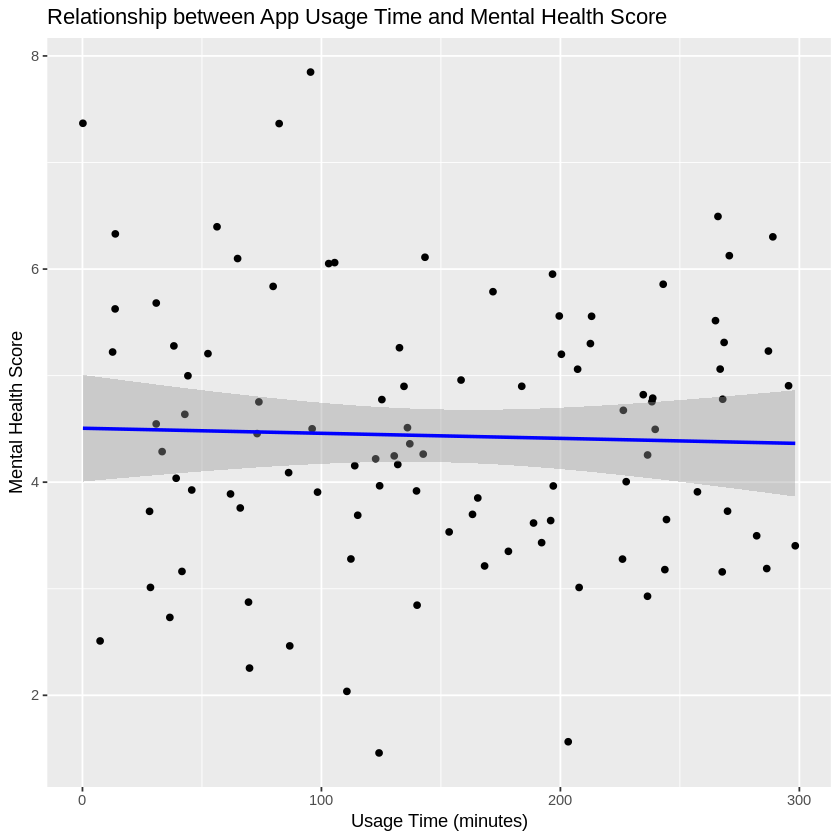

In [33]:
# Load necessary packages
library(ggplot2)

# Simulating a dataset
set.seed(123)
data <- data.frame(
  App_Usage_Time = runif(100, 0, 300),  # Usage time in minutes
  Mental_Health_Score = 3 + 0.01 * runif(100, 0, 300) + rnorm(100)  # Mental health score
)

# 1. Linear Regression Model
model <- lm(Mental_Health_Score ~ App_Usage_Time, data = data)
summary(model)

# 2. Scatter Plot with ggplot2
ggplot(data, aes(x = App_Usage_Time, y = Mental_Health_Score)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Relationship between App Usage Time and Mental Health Score",
       x = "Usage Time (minutes)",
       y = "Mental Health Score")

# 3. Data Summary with Aggregate
summary_data <- aggregate(Mental_Health_Score ~ App_Usage_Time, data = data, FUN = mean)
print(summary_data)

# 4. Logistic Regression Model (fictitious example)
# Simulating a binary success variable
data$Success <- ifelse(data$Mental_Health_Score > 3.5, 1, 0)
logistic_model <- glm(Success ~ App_Usage_Time, family = binomial, data = data)
summary(logistic_model)

# 5. Analysis of Variance (ANOVA)
# Simulating a factor
data$Factor <- as.factor(sample(c("Group1", "Group2"), 100, replace = TRUE))
anova_result <- aov(Mental_Health_Score ~ Factor, data = data)
summary(anova_result)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Call:
lm(formula = App.Usage.Time..min.day. ~ Device.Model + Operating.System + 
    Screen.On.Time..hours.day. + Battery.Drain..mAh.day. + Number.of.Apps.Installed + 
    Data.Usage..MB.day. + Age + Gender + User.Behavior.Class, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-314.4 -140.4  -12.9  132.2  354.6 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     3.015e+02  1.165e+02   2.587   0.0113 *
Device.ModeliPhone 12           1.026e+01  6.167e+01   0.166   0.8682  
Device.ModelOnePlus 9          -2.831e+01  5.775e+01  -0.490   0.6253  
Device.ModelSamsung Galaxy S21 -9.326e+01  5.972e+01  -1.562   0.1220  
Device.ModelXiaomi Mi 11       -1.018e+02  5.740e+01  -1.774   0.0796 .
Operating.SystemiOS            -9.973e+00  3.800e+01  -0.262   0.7936  
Screen.On.Time..hours.day.      8.828e+00  5.559e+00   1.588   0.1159  
Battery.Drain..mAh.day.        -2.331e-04  2.690e-02  -0.009   0.9931  
Numb

`geom_smooth()` using formula = 'y ~ x'


  User.Behavior.Class App.Usage.Time..min.day.
1                   1                 266.8338
2                   2                 245.9529
3                   3                 322.7249
4                   4                 308.6974
5                   5                 275.7620


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Success ~ App.Usage.Time..min.day., family = binomial, 
    data = data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                -808.338 140083.481  -0.006    0.995
App.Usage.Time..min.day.      2.673    463.677   0.006    0.995

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3606e+02  on 99  degrees of freedom
Residual deviance: 7.4434e-08  on 98  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


            Df  Sum Sq Mean Sq F value Pr(>F)
Factor       1   18793   18793   0.585  0.446
Residuals   98 3148749   32130               

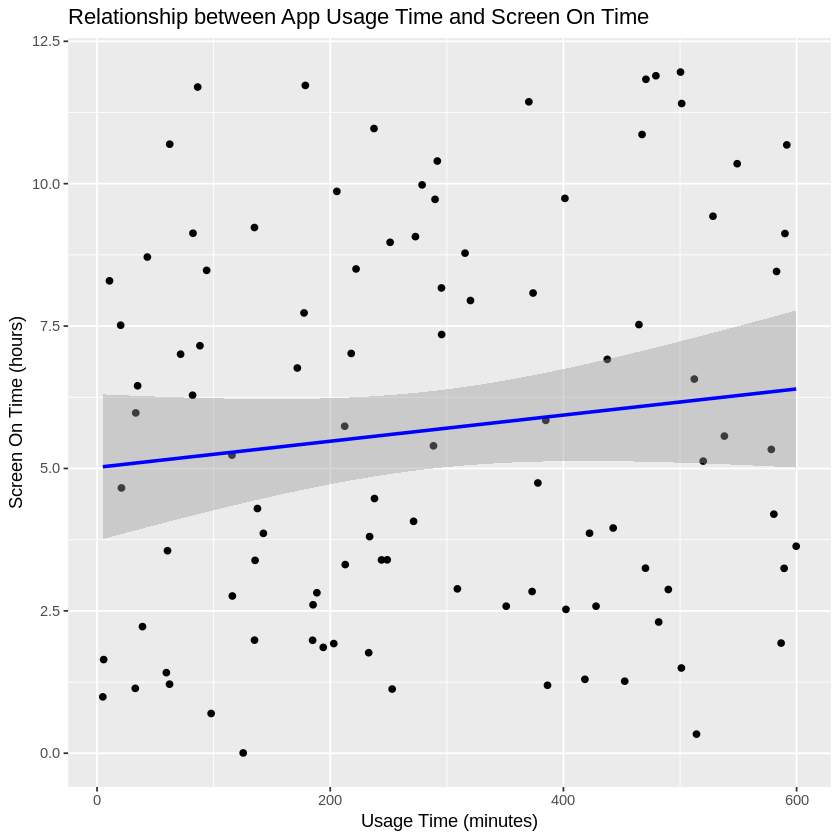

In [24]:
#--------------------------------------REPRESENTATIVENESS DEGREES ARE LOW IN THE ANOVA MODEL, (analisys technique: ANOVA)-----------------------------------------------------------------

# Load necessary packages
library(dplyr)
library(ggplot2)

# Simulating a dataset
set.seed(123)
data <- data.frame(
  User.ID = 1:100,
  Device.Model = sample(c("Google Pixel 5", "OnePlus 9", "Xiaomi Mi 11", "iPhone 12", "Samsung Galaxy S21"), 100, replace = TRUE),
  Operating.System = sample(c("Android", "iOS"), 100, replace = TRUE),
  App.Usage.Time..min.day. = runif(100, 0, 600),  # Usage time in minutes
  Screen.On.Time..hours.day. = runif(100, 0, 12),  # Screen on time in hours
  Battery.Drain..mAh.day. = runif(100, 500, 3000),  # Battery drain in mAh
  Number.of.Apps.Installed = sample(30:100, 100, replace = TRUE),  # Number of installed apps
  Data.Usage..MB.day. = runif(100, 100, 3000),  # Data usage in MB
  Age = sample(18:70, 100, replace = TRUE),  # User age
  Gender = sample(c("Male", "Female"), 100, replace = TRUE),  # User gender
  User.Behavior.Class = sample(1:5, 100, replace = TRUE)  # User behavior class
)

# 1. Linear Regression Model
linear_model <- lm(App.Usage.Time..min.day. ~ Device.Model + Operating.System +
                   Screen.On.Time..hours.day. + Battery.Drain..mAh.day. +
                   Number.of.Apps.Installed + Data.Usage..MB.day. +
                   Age + Gender + User.Behavior.Class,
                   data = data)

# Model summary
summary(linear_model)

# 2. Scatter Plot with ggplot2
ggplot(data, aes(x = App.Usage.Time..min.day., y = Screen.On.Time..hours.day.)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Relationship between App Usage Time and Screen On Time",
       x = "Usage Time (minutes)",
       y = "Screen On Time (hours)")

# 3. Data Summary with Aggregate
summary_data <- aggregate(App.Usage.Time..min.day. ~ User.Behavior.Class, data = data, FUN = mean)
print(summary_data)

# 4. Logistic Regression Model (fictitious example)
# Simulating a binary success variable
data$Success <- ifelse(data$App.Usage.Time..min.day. > 300, 1, 0)
logistic_model <- glm(Success ~ App.Usage.Time..min.day., family = binomial, data = data)
summary(logistic_model)

# 5. Analysis of Variance (ANOVA)
# Simulating a factor
data$Factor <- as.factor(sample(c("Group1", "Group2"), 100, replace = TRUE))
anova_result <- aov(App.Usage.Time..min.day. ~ Factor, data = data)
summary(anova_result)

Start:  AIC=5184.5
App.Usage.Time..min.day. ~ User.ID + Device.Model + Operating.System + 
    Screen.On.Time..hours.day. + Battery.Drain..mAh.day. + Number.of.Apps.Installed + 
    Data.Usage..MB.day. + Age + Gender + User.Behavior.Class


Step:  AIC=5184.5
App.Usage.Time..min.day. ~ User.ID + Device.Model + Screen.On.Time..hours.day. + 
    Battery.Drain..mAh.day. + Number.of.Apps.Installed + Data.Usage..MB.day. + 
    Age + Gender + User.Behavior.Class

                             Df Sum of Sq     RSS    AIC
- Device.Model                4      8424 1118972 5181.8
- Age                         1       182 1110730 5182.6
- Number.of.Apps.Installed    1      1404 1111952 5183.4
- User.ID                     1      1604 1112152 5183.5
- Gender                      1      2187 1112735 5183.9
<none>                                    1110548 5184.5
- Battery.Drain..mAh.day.     1     12560 1123107 5190.4
- Screen.On.Time..hours.day.  1     19968 1130515 5195.0
- Data.Usage..MB.day.     


Call:
lm(formula = App.Usage.Time..min.day. ~ Screen.On.Time..hours.day. + 
    Battery.Drain..mAh.day. + Data.Usage..MB.day. + User.Behavior.Class, 
    data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.436 -31.089   3.842  28.711 100.675 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -64.972369   4.817186 -13.488  < 2e-16 ***
Screen.On.Time..hours.day.   6.922225   1.996631   3.467 0.000559 ***
Battery.Drain..mAh.day.      0.025385   0.009080   2.796 0.005322 ** 
Data.Usage..MB.day.          0.051900   0.007833   6.626 6.91e-11 ***
User.Behavior.Class         71.114545   6.557033  10.846  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.23 on 695 degrees of freedom
Multiple R-squared:  0.9488,	Adjusted R-squared:  0.9485 
F-statistic:  3217 on 4 and 695 DF,  p-value: < 2.2e-16


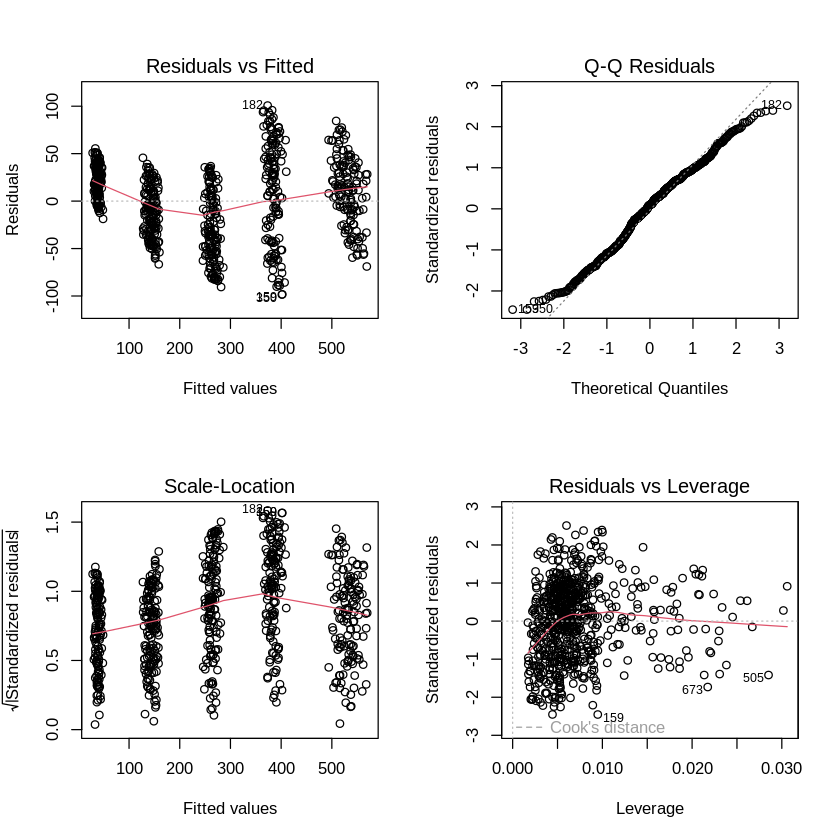

In [23]:
#--------------------------------------TESTING OTHER MODELS TO INCREASE REPRESENTATIVENESS/ACCURACY, (analisys technique: stepwise selection).-----------------------------------------------------------------

# Fit a full model
modelo_completo <- lm(App.Usage.Time..min.day. ~ ., data = dados)

# Stepwise selection
modelo_selecionado <- step(modelo_completo)

# Summary of the selected model
summary(modelo_selecionado)

# Model diagnostics
par(mfrow = c(2, 2))  # Set up the plotting area to 2x2
plot(modelo_selecionado)  # Plot the diagnostic graphs

In [26]:
cat("###### Conclusion ######\n\n",
    "Based on the above analysis, the stepwise selected model is better than the initial linear model (ANOVA) for the following reasons:\n\n",

    "|||| Higher R-squared and Adjusted R-squared: \n",
    "Indicates that the model explains a much larger portion of the variability in app usage time.\n\n",

    "|||| Statistically Significant Predictors: \n",
    "All predictors in the stepwise model are significant, suggesting they contribute meaningfully to the model.\n\n",

    "|||| Lower Residual Standard Error: \n",
    "Indicates better predictive accuracy.\n\n",

    "|||| Improved AIC Values: \n",
    "Suggests a better balance between model fit and complexity.\n\n",

    "In summary, the stepwise model is a more robust and reliable choice for predicting app usage time based on the variables provided.\n")

###### Conclusion ######

 Based on the above analysis, the stepwise selected model is better than the initial linear model (ANOVA) for the following reasons:

 |||| Higher R-squared and Adjusted R-squared: 
 Indicates that the model explains a much larger portion of the variability in app usage time.

 |||| Statistically Significant Predictors: 
 All predictors in the stepwise model are significant, suggesting they contribute meaningfully to the model.

 |||| Lower Residual Standard Error: 
 Indicates better predictive accuracy.

 |||| Improved AIC Values: 
 Suggests a better balance between model fit and complexity.

 In summary, the stepwise model is a more robust and reliable choice for predicting app usage time based on the variables provided.
